In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# split data
from sklearn.model_selection import train_test_split

# model cnn
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation

import cv2
import os
import shutil


In [2]:
main_path = r"C:\Users\PC\Desktop\Проги\ML\Tinder_bot\Dataset"

folders = []
for i in os.listdir(main_path):
    print(i)
    folders.append(i)
print(folders)


Dislike
Like
['Dislike', 'Like']


C:\Users\PC\Desktop\Проги\ML\Tinder_bot\Dataset\Dislike\0.jpg


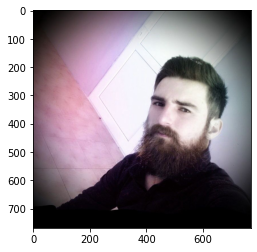

In [3]:
for folder in folders:
    local_path = os.path.join(main_path, folder)
    for file in os.listdir(local_path):
        img = os.path.join(local_path, file)
        print(img)
        img_arr = plt.imread(img)  # convert image to array by 3D
        plt.imshow(plt.imread(img))
        break
    break


In [4]:
print(np.shape(img_arr))


(768, 768, 3)


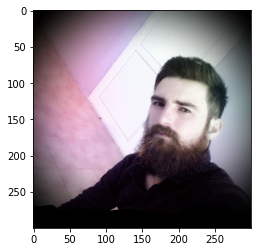

In [5]:
SIZE = 300
new_arr = cv2.resize(img_arr, (SIZE, SIZE))
plt.imshow(new_arr)


In [6]:
classes = {"Dislike": 0, "Like": 1}

# получаем класс по номеру


def get_class(x):
    for i, j in classes.items():
        if j == x:
            return i


In [7]:
data = []
for folder in folders:
    local_path = os.path.join(main_path, folder)
    for file in os.listdir(local_path):
        img = os.path.join(local_path, file)
        try:
            # переводим фото в массив из серых фотографий
            img_arr = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
            if img_arr is None:
                shutil.copy(img, file)
                img_arr = cv2.imread(file)
                os.remove(file)
            new_arr = cv2.resize(img_arr, (SIZE, SIZE))
            data.append([new_arr, classes[folder]])
        except Exception as e:
            pass


In [8]:
import random
random.shuffle(data)


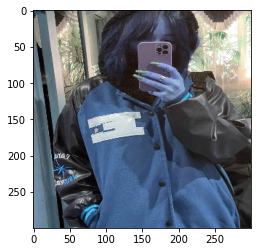

In [9]:
plt.imshow(data[0][0])


In [10]:
# Разбиваем данные на фото и лейблы к ним
X, y = [], []
for features, labels in data:
    X.append(features)
    y.append(labels)


In [11]:
len(X)


1806

In [12]:
y = np.array(y)


In [13]:
y.shape

(1806,)

In [14]:
X = np.array(X)


In [15]:
X.shape


(1806, 300, 300, 3)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)


In [18]:
X_train.shape


(1354, 300, 300, 3)

In [19]:
# Строим модель
model = Sequential()

# 1ый слой
model.add(Conv2D(64, kernel_size=(4, 4), strides=2, padding="same", activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(2))

# 2 слой
model.add(Conv2D(128, kernel_size=(3, 3), strides=2, padding="same", activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(2))

# 3 слой
model.add(Conv2D(256, kernel_size=(2, 2), strides=2, padding="same", activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(2))

# Flatten
model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [20]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["Recall"],
)


In [22]:
my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor="Precision", min_delta=0.01, patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath="model.{epoch:02d}-{recall:.4f}.h5"),
    #tf.keras.callbacks.ProgbarLogger(count_mode="steps", stateful_metrics="val_accuracy"),
]


In [25]:
len(X_train)

1354

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data = [X_test, y_test],
    callbacks=my_callbacks,
    epochs = 20, 
)


In [ ]:
#model.save("Tinder.h5")


In [55]:
#model = tf.keras.models.load_model("model.20-0.6381.h5")

In [36]:
def predict_image(image_directory):
    file = image_directory[image_directory.rfind("\\") + 1 :]

    test_image = cv2.imread(image_directory)
    if test_image is None:
        shutil.copy(image_directory, file)
        test_image = cv2.imread(file)
        os.remove(file)

    test_image = cv2.resize(test_image, (SIZE, SIZE))
    plt.imshow(test_image)  # Отрисовать фотографию
    test_image = np.array(test_image)
    test_image = test_image.reshape(-1, SIZE, SIZE, 3)

    result = model.predict(test_image)
    return result[0][0]
    #int_result = result[0][0] * 100
    #print(result[0][0], int_result)
    '''
    if 20 > int_result > 7:
        predication = "Like"
    else:
        predication = "Dislike"
    return predication
    '''


1/1 [==============================] - 0s 74ms/step


0.7497291

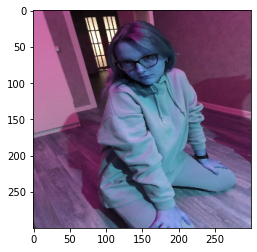

In [56]:
predict_image(r"C:\Users\PC\Desktop\Проги\ML\Tinder_bot\Dataset\Like\photo_810@21-01-2022_13-26-53.jpg")